# Convex hull as diagnostic tool in single-molecule localization microscopy
# Examples of merged and subdivided clusters

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import py_files.simulations as si
from py_files.matplotlib_custom import second_axis_log, second_axis, pie_plot

In [2]:
def cluster_properties(samples, labels):
    unique_labels = np.unique(labels)
    unique_labels = np.delete(unique_labels, np.where(unique_labels == -1))
    vertices_collect = []
    coordinates = []
    for i in unique_labels:
        indices_cluster = np.where(labels == i)
        samples_cluster = samples[indices_cluster]
        hull = ConvexHull(samples_cluster)
        vertices = hull.vertices
        vertices_collect.append(samples_cluster[vertices])
        coordinate = np.mean(samples_cluster, axis=0)
        coordinates.append(coordinate)
    coordinates = np.array(coordinates)
    
    return coordinates, vertices_collect

## Merging

In [3]:
parent_intensity = 1e-5
sim_param = dict(cluster_mu=9, cluster_std=8, lower_limit=-5000, upper_limit=5000, min_samples=3, 
                 seed=np.random.default_rng(100))
alg_param = dict(eps=25, min_samples=3)
samples, labels, _ = si.sim_dstorm(parent_intensity=parent_intensity, **sim_param)
clust_labels = DBSCAN(**alg_param).fit_predict(samples)

In [4]:
indices = np.where((samples[:, 0] > -500) & 
                   (samples[:, 1] > 1100) &
                   (samples[:, 0] < -400) &
                   (samples[:, 1] < 1200))
samples_filtered = samples[indices]
labels_filtered = labels[indices]
clust_labels_filtered = clust_labels[indices]

### Visualize ground truth

In [5]:
coordinates_sim, vertices_collect_sim = cluster_properties(samples_filtered, labels_filtered)

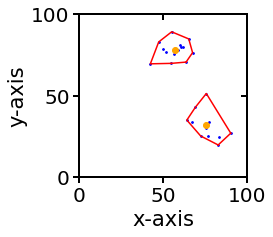

In [7]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(samples_filtered[:, 0], samples_filtered[:, 1], s=3, color="blue")
ax.scatter(coordinates_sim[:, 0], coordinates_sim[:, 1], color="orange")
ax.set_xlim(-500, -400)
ax.set_ylim(1100, 1200)
tick_spacing_x = 50
x_ticker = ticker.MultipleLocator(tick_spacing_x)
ax.xaxis.set_major_locator(x_ticker)
tick_spacing_y = 50
y_ticker = ticker.MultipleLocator(tick_spacing_y)
ax.yaxis.set_major_locator(y_ticker)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.tick_params(labelsize=20, width=2, length=6)
ax.set_ylabel("y-axis", fontsize=21)
ax.set_xlabel("x-axis", fontsize=21)
x_ticks = x_ticker.tick_values(-499, -401)
ax.set_xticks(x_ticks)
x_labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(x_ticks)):
    x_labels[i] = str(0 + 50*i)
ax.set_xticklabels(x_labels)
y_ticks = y_ticker.tick_values(1101, 1199)
ax.set_yticks(y_ticks)
y_labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(len(y_ticks)):
    y_labels[i] = str(0 + 50*i)
ax.set_yticklabels(y_labels)
for vertex in vertices_collect_sim:
    ax.plot(vertex[:, 0], vertex[:, 1], "r")
    ax.plot([vertex[-1, 0], vertex[0, 0]], [vertex[-1, 1], vertex[0, 1]], "r")
fig.savefig(r"plt_figures\merged_clusters_scatter_ground_truth.svg")

### Visualize DBSCAN result

In [8]:
coordinates_alg, vertices_collect_alg = cluster_properties(samples_filtered, clust_labels_filtered)

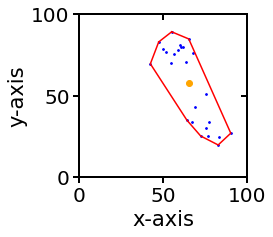

In [9]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(samples[:, 0], samples[:, 1], s=3, color="blue")
ax.scatter(coordinates_alg[:, 0], coordinates_alg[:, 1], color="orange")
ax.set_xlim(-500, -400)
ax.set_ylim(1100, 1200)
tick_spacing_x = 50
x_ticker = ticker.MultipleLocator(tick_spacing_x)
ax.xaxis.set_major_locator(x_ticker)
tick_spacing_y = 50
y_ticker = ticker.MultipleLocator(tick_spacing_y)
ax.yaxis.set_major_locator(y_ticker)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.tick_params(labelsize=20, width=2, length=6)
ax.set_ylabel("y-axis", fontsize=21)
ax.set_xlabel("x-axis", fontsize=21)
x_ticks = x_ticker.tick_values(-499, -401)
ax.set_xticks(x_ticks)
x_labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(x_ticks)):
    x_labels[i] = str(0 + 50*i)
ax.set_xticklabels(x_labels)
y_ticks = y_ticker.tick_values(1101, 1199)
ax.set_yticks(y_ticks)
y_labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(len(y_ticks)):
    y_labels[i] = str(0 + 50*i)
ax.set_yticklabels(y_labels)
for vertex in vertices_collect_alg:
    ax.plot(vertex[:, 0], vertex[:, 1], "r")
    ax.plot([vertex[-1, 0], vertex[0, 0]], [vertex[-1, 1], vertex[0, 1]], "r")
fig.savefig(r"plt_figures\merged_clusters_scatter_DBSCAN.svg")

## Subdivision

In [10]:
radius = 35
sim_param = dict(parent_intensity=1e-5, cluster_mu=9, cluster_std=8, min_samples=3, 
                 seed=np.random.default_rng(100), lower_limit=-5000, upper_limit=5000, ratio=0.2, 
                 mode="random", replace_min=2, replace_max=10, p_value=0.3)
alg_param = dict(eps=25, min_samples=3)
samples, labels, _, _, _ = si.sim_clusters(radius=radius, **sim_param)
clust_labels = DBSCAN(**alg_param).fit_predict(samples)

In [11]:
indices = np.where((samples[:, 0] > 4500) & 
                   (samples[:, 1] > 3900) &
                   (samples[:, 0] < 4600) &
                   (samples[:, 1] < 4000))
samples_filtered = samples[indices]
labels_filtered = labels[indices]
clust_labels_filtered = clust_labels[indices]

### Visualize ground truth

In [12]:
coordinates_sim, vertices_collect_sim = cluster_properties(samples_filtered, labels_filtered)

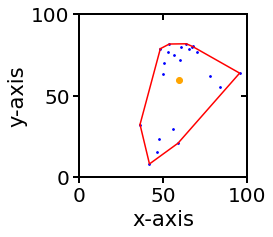

In [13]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(samples_filtered[:, 0], samples_filtered[:, 1], s=3, color="blue")
ax.scatter(coordinates_sim[:, 0], coordinates_sim[:, 1], color="orange")
ax.set_xlim(4500, 4600)
ax.set_ylim(3900, 4000)
tick_spacing_x = 50
x_ticker = ticker.MultipleLocator(tick_spacing_x)
ax.xaxis.set_major_locator(x_ticker)
tick_spacing_y = 50
y_ticker = ticker.MultipleLocator(tick_spacing_y)
ax.yaxis.set_major_locator(y_ticker)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.tick_params(labelsize=20, width=2, length=6)
ax.set_ylabel("y-axis", fontsize=21)
ax.set_xlabel("x-axis", fontsize=21)
x_ticks = x_ticker.tick_values(4501, 4599)
ax.set_xticks(x_ticks)
x_labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(x_ticks)):
    x_labels[i] = str(0 + 50*i)
ax.set_xticklabels(x_labels)
y_ticks = y_ticker.tick_values(3901, 3999)
ax.set_yticks(y_ticks)
y_labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(len(y_ticks)):
    y_labels[i] = str(0 + 50*i)
ax.set_yticklabels(y_labels)
for vertex in vertices_collect_sim:
    ax.plot(vertex[:, 0], vertex[:, 1], "r")
    ax.plot([vertex[-1, 0], vertex[0, 0]], [vertex[-1, 1], vertex[0, 1]], "r")
fig.savefig(r"plt_figures\subdivided_clusters_scatter_ground_truth.svg")

### Visualize DBSCAN result

In [14]:
coordinates_alg, vertices_collect_alg = cluster_properties(samples_filtered, clust_labels_filtered)

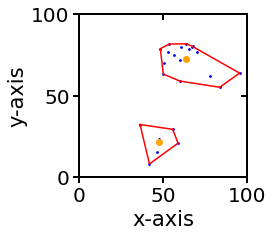

In [15]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(samples[:, 0], samples[:, 1], s=3, color="blue")
ax.scatter(coordinates_alg[:, 0], coordinates_alg[:, 1], color="orange")
ax.set_xlim(4500, 4600)
ax.set_ylim(3900, 4000)
tick_spacing_x = 50
x_ticker = ticker.MultipleLocator(tick_spacing_x)
ax.xaxis.set_major_locator(x_ticker)
tick_spacing_y = 50
y_ticker = ticker.MultipleLocator(tick_spacing_y)
ax.yaxis.set_major_locator(y_ticker)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.tick_params(labelsize=20, width=2, length=6)
ax.set_ylabel("y-axis", fontsize=21)
ax.set_xlabel("x-axis", fontsize=21)
x_ticks = x_ticker.tick_values(4501, 4599)
ax.set_xticks(x_ticks)
x_labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(x_ticks)):
    x_labels[i] = str(0 + 50*i)
ax.set_xticklabels(x_labels)
y_ticks = y_ticker.tick_values(3901, 3999)
ax.set_yticks(y_ticks)
y_labels = [item.get_text() for item in ax.get_yticklabels()]
for i in range(len(y_ticks)):
    y_labels[i] = str(0 + 50*i)
ax.set_yticklabels(y_labels)
for vertex in vertices_collect_alg:
    ax.plot(vertex[:, 0], vertex[:, 1], "r")
    ax.plot([vertex[-1, 0], vertex[0, 0]], [vertex[-1, 1], vertex[0, 1]], "r")
fig.savefig(r"plt_figures\subdivided_clusters_scatter_DBSCAN.svg")